In [217]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing data

m_data=pd.read_csv("Leads.csv")
m_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
m_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data handling
# check for Null values


In [ ]:
#there are multiple columns with values as "select", it means end user did not selcte anything while filling the form/survey


In [8]:
#Need to deal with "selects"
m_data=m_data.replace('Select',np.nan)

In [9]:
m_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#checking for null values

In [10]:
m_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
round(m_data.isnull().sum()/len(m_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [12]:
# Dropping the columns which have 40% are greater missing values
m_data=m_data.drop(columns=['I agree to pay the amount through cheque','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality','Lead Profile','How did you hear about X Education'])

In [13]:
#checking null% once again 
round(m_data.isnull().sum()/len(m_data.index),2)*100


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [ ]:
#there are 2 column with 37% and 36% missing values 
-Specialization 37% missing values 
- Tags 36% missing values
- city also have 40% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

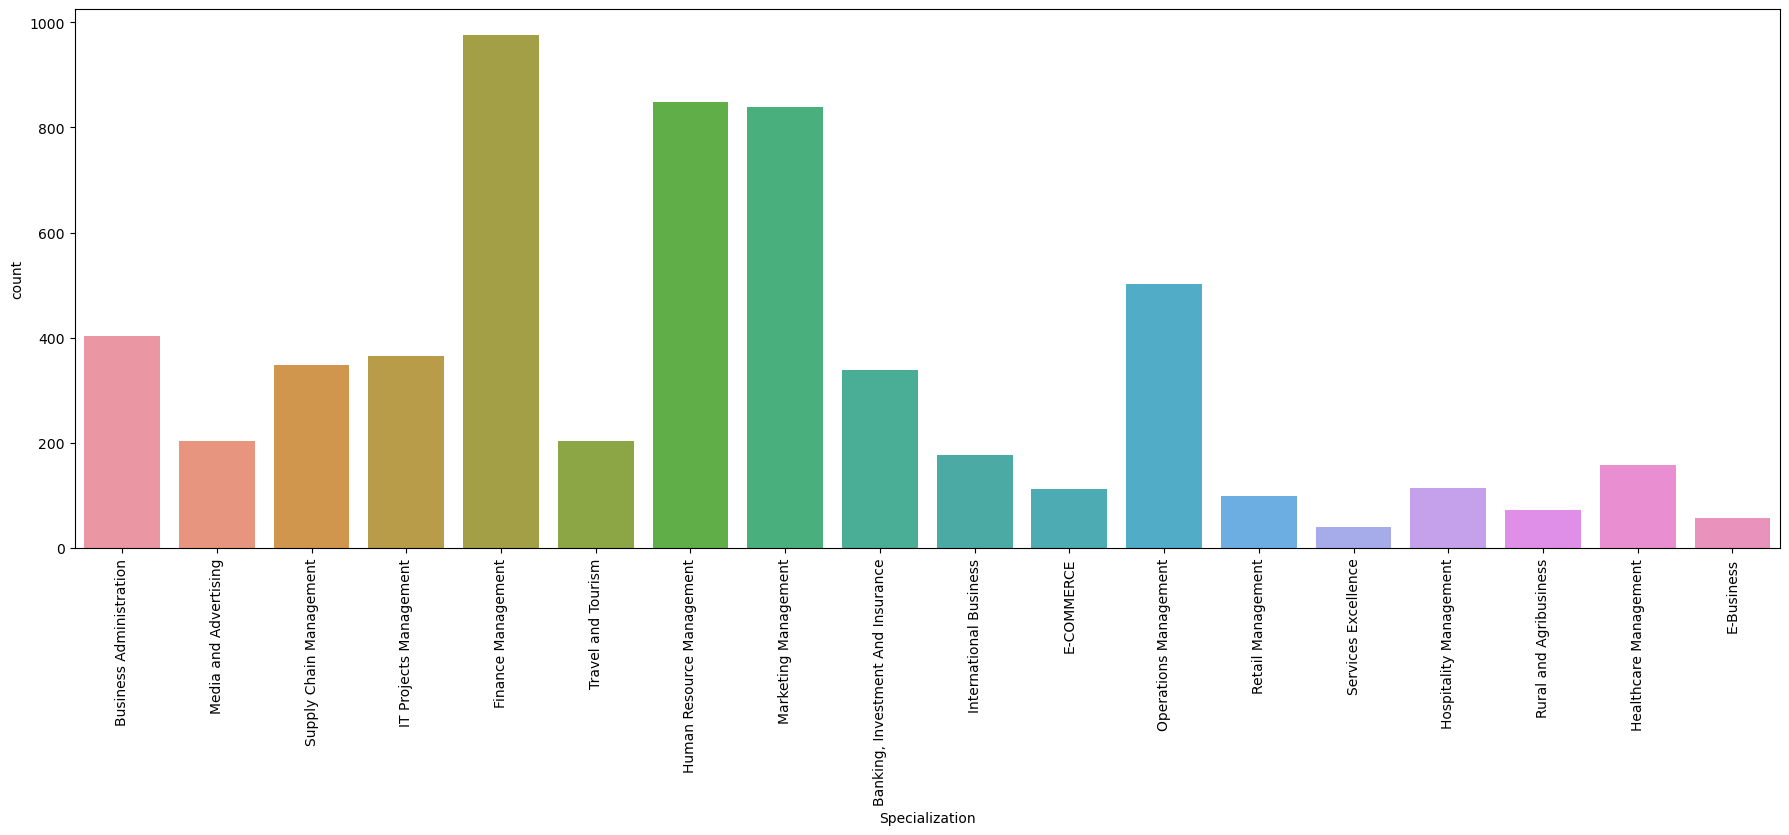

In [14]:
#lets check the distribution of each one above mentioned columns 

#Specialization

plt.figure(figsize= (22,7))
sns.countplot(m_data['Specialization'])
plt.xticks(rotation=90)

In [15]:
#assumption - as 37% missing values in specilaization column might be due to -lead did not select any specilazation. 
#to deal with this we can add another Category  'Others' 

m_data['Specialization']= m_data['Specialization'].replace(np.nan, 'others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

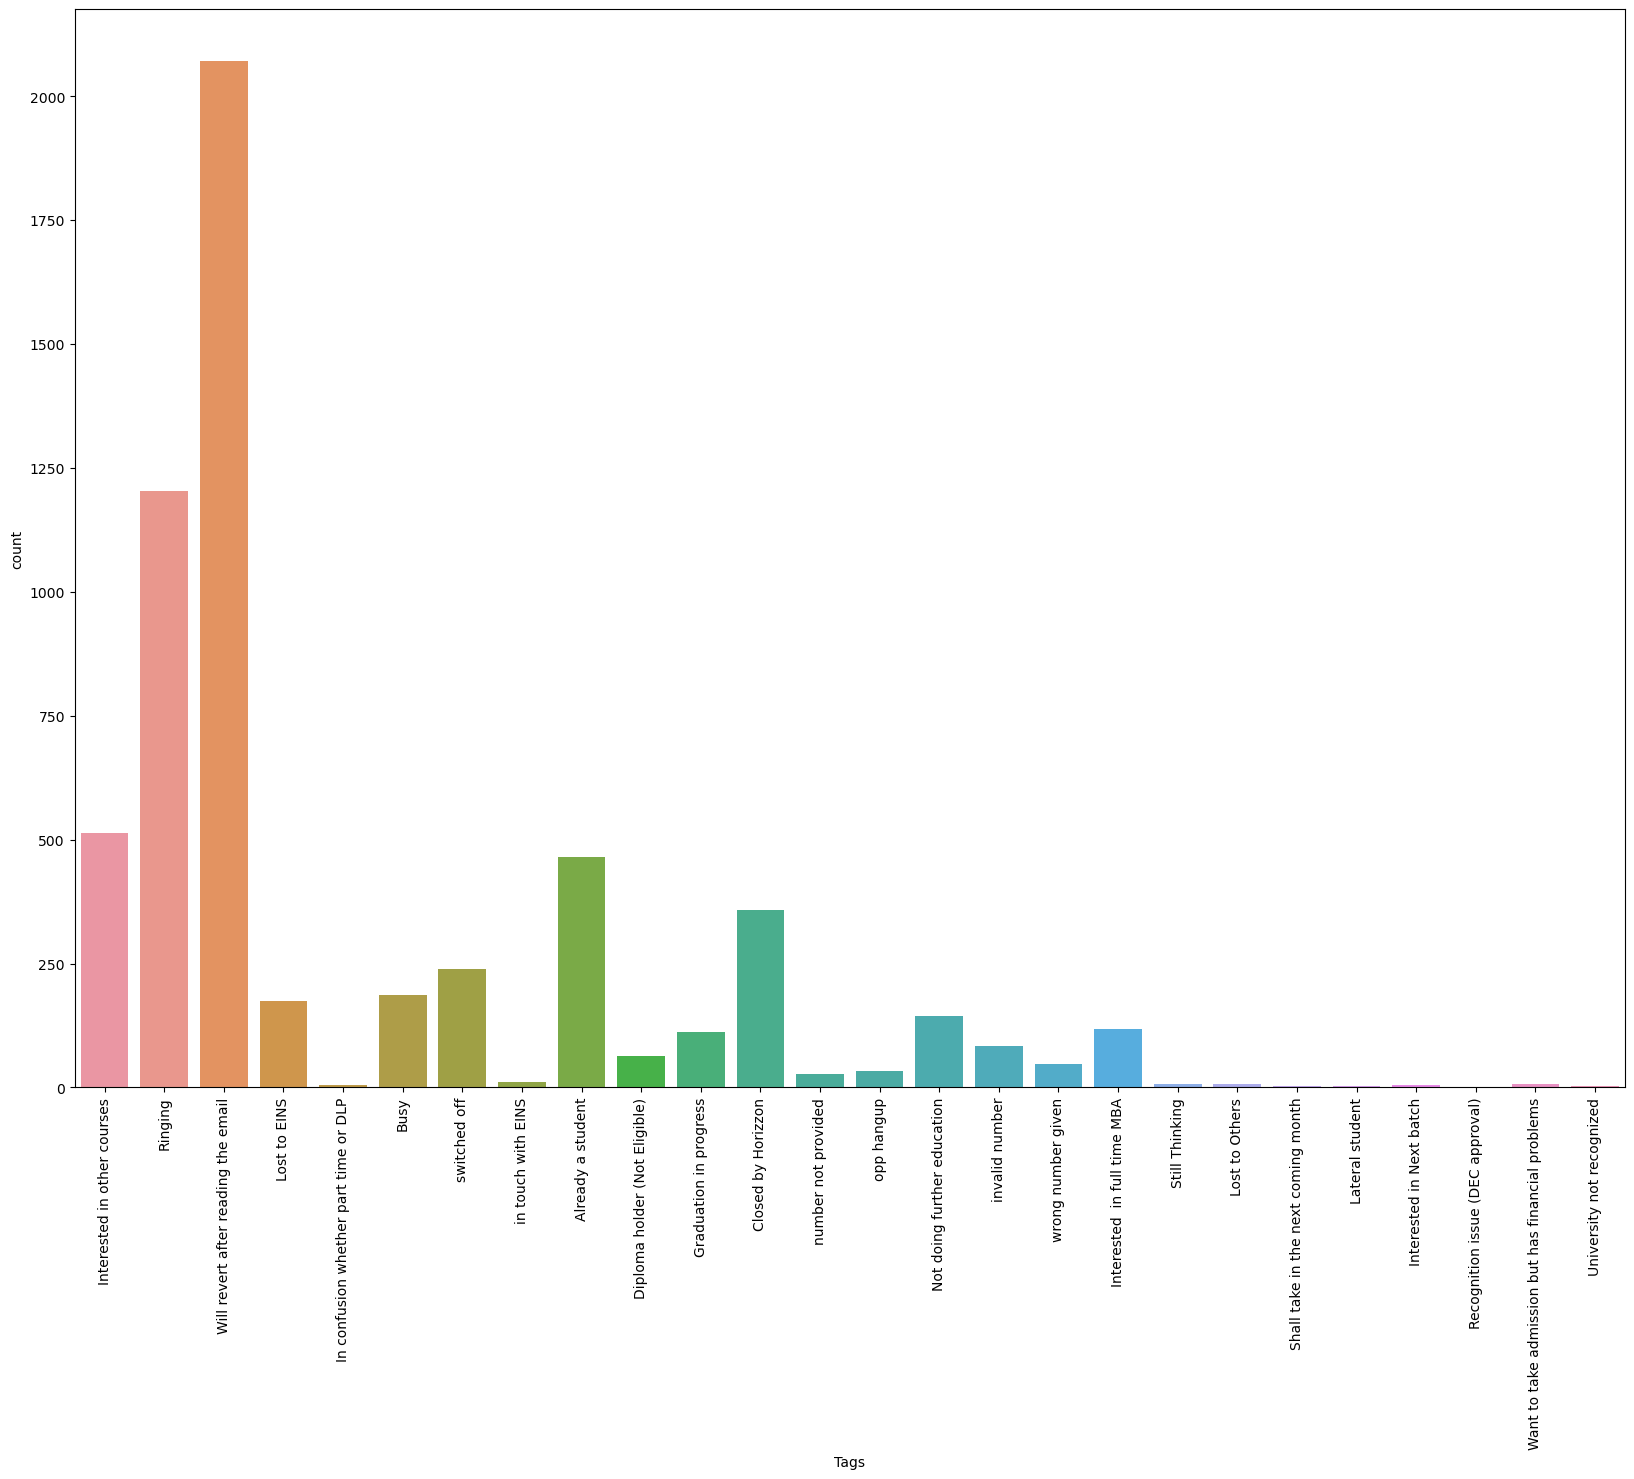

In [16]:
#deal with second clolums 'Tags'
plt.figure(figsize=(20,14))
sns.countplot(m_data['Tags'])
plt.xticks(rotation =90)

In [17]:
# as most of the values under "revert after reading the email", we impute this for missing values
m_data['Tags']= m_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [18]:
 
#checking null% once again 
round(m_data.isnull().sum()/len(m_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

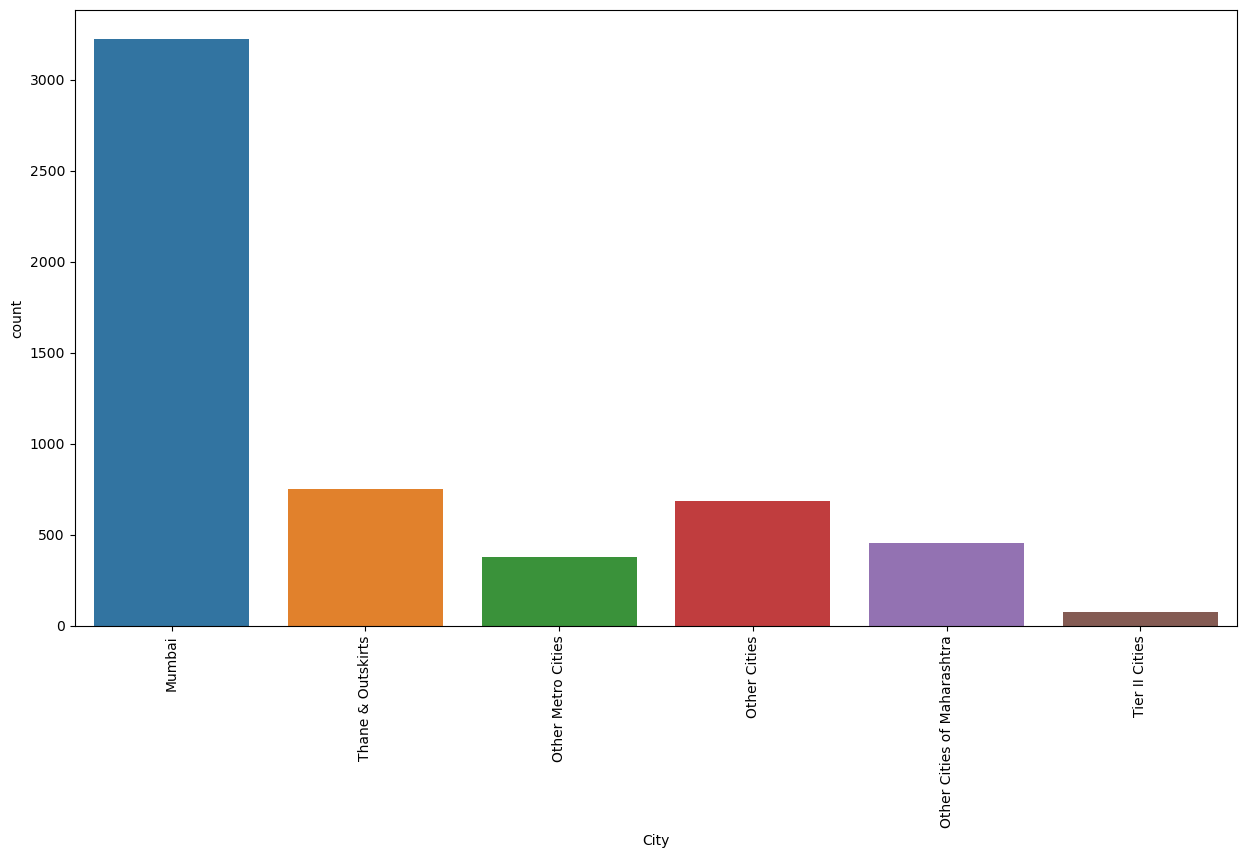

In [19]:
#city column has 40% missing values, lets deal with missing values for this column

plt.figure(figsize=(15,8))
sns.countplot(m_data['City'])
plt.xticks(rotation=90)

In [20]:
#as more than 50% leads are from Mumbai, we can impute Mumbai for missing values
m_data['City']=m_data['City'].replace(np.nan,'Mumbai')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

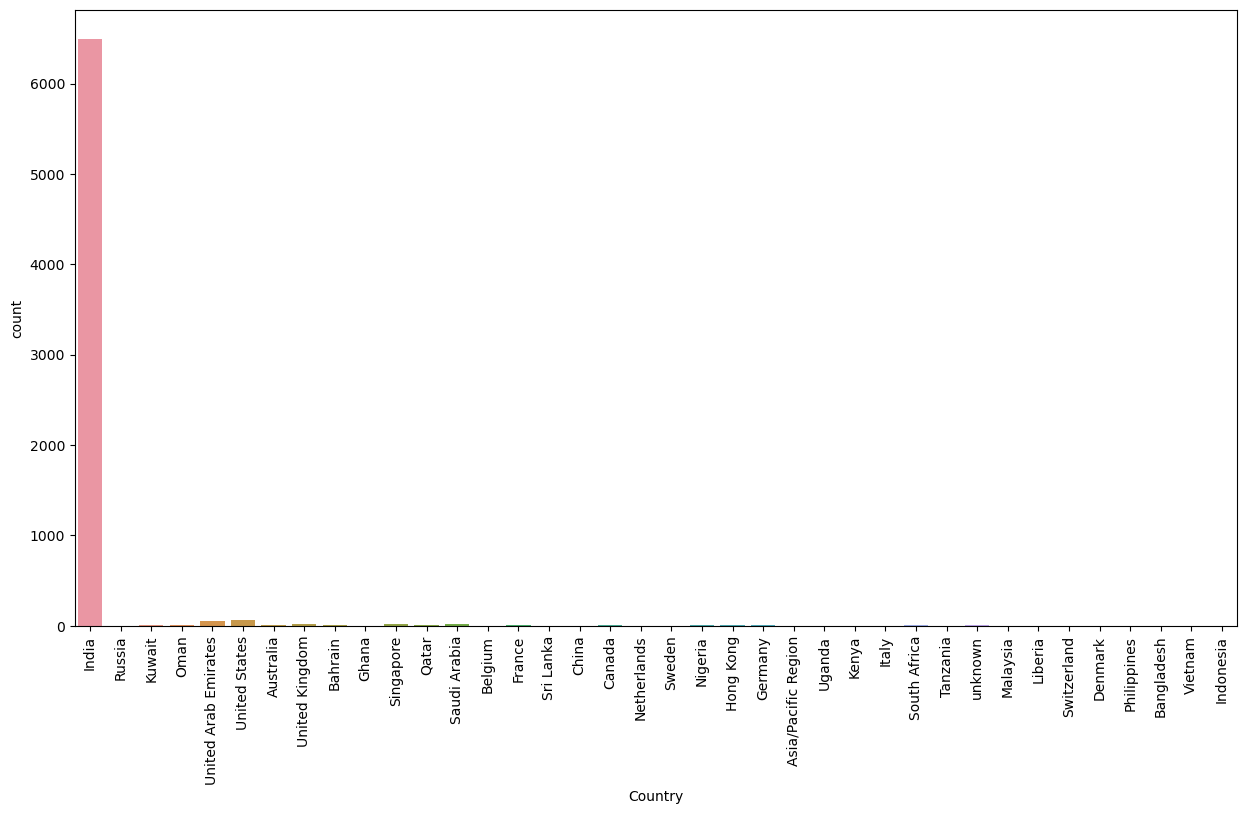

In [21]:
#Next column to deal with missing values is 'Country' which have 27% missing values

plt.figure(figsize=(15,8))
sns.countplot(m_data['Country'])
plt.xticks(rotation=90)

In [22]:
# as most of the leads are from India we can impute missing values with India

m_data['Country']=m_data['Country'].replace(np.nan,'India')

In [23]:
#checking null% once again 
round(m_data.isnull().sum()/len(m_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                           0.0
Specialization                                    0.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

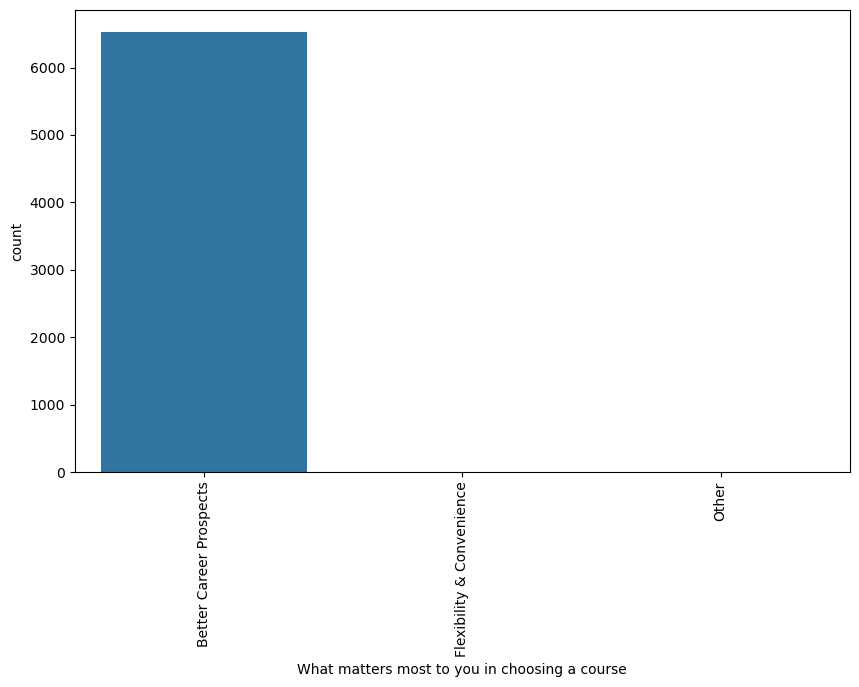

In [24]:
#still we have 2 columns with missing values
#1- What matters most to you in choosing a course    29.0% lets deal with this first

plt.figure(figsize=(10,6))
sns.countplot(m_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [25]:
#as this is highly skewes column which might influence model output so we need to remove this column 

m_data= m_data.drop('What matters most to you in choosing a course', axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

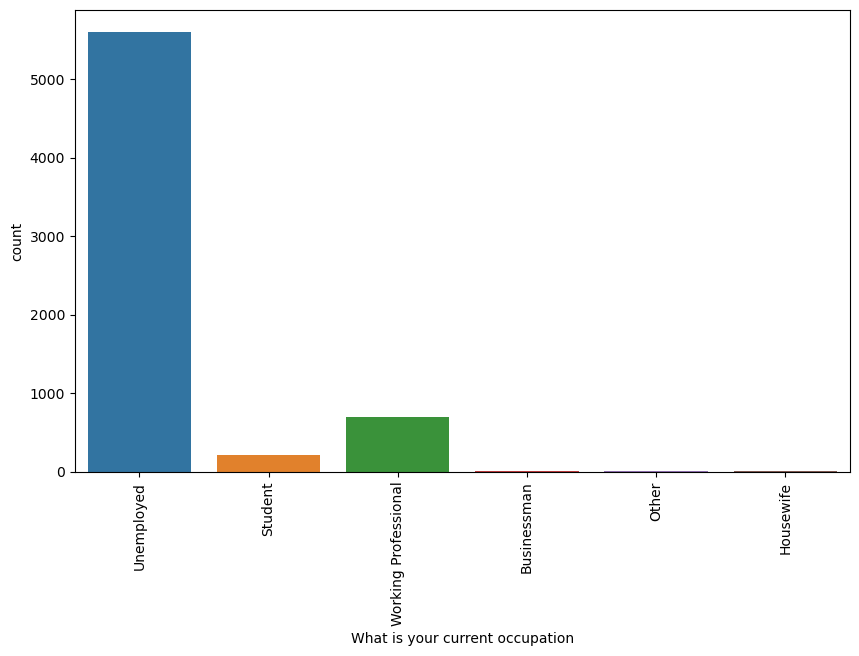

In [26]:
#another column with missing values is "What is your current occupation" 
plt.figure(figsize=(10,6))
sns.countplot(m_data['What is your current occupation'])
plt.xticks(rotation=90)

In [27]:
# As most of the leads are Unemployed we can impute this for missing values
m_data['What is your current occupation']= m_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [28]:
#checking null% once again 
round(m_data.isnull().sum()/len(m_data.index),2)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               1.0
Total Time Spent on Website               0.0
Page Views Per Visit                      1.0
Last Activity                             1.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Cou

In [29]:
#dropping the missing values rows as these are 1% missing values
m_data.dropna(inplace= True)

In [30]:
#checking null% once again 
round(m_data.isnull().sum()/len(m_data.index),2)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Cou

In [31]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Do Not Call                             9074 non-null   object 
 6   Converted                               9074 non-null   int64  
 7   TotalVisits                             9074 non-null   float64
 8   Total Time Spent on Website             9074 non-null   int64  
 9   Page Views Per Visit                    9074 non-null   float64
 10  Last Activity                           9074 non-null   obje

# Exploraory Data Analysis 

1 Univarite Analysis and bivariate Analysis



In [32]:
###1 column  Converted : This is our target variable. If its value is 1 , it means lead converted Successfully
                       # If its value is 0 then it means lead is not converted properly 
    
  #checking for conversion in shared data = 

Conversion_rate=round(sum(m_data['Converted'])/len(m_data['Converted'].index),2)*100
Conversion_rate

38.0

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

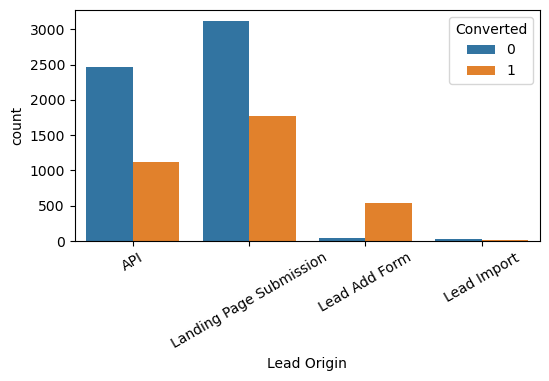

In [33]:
## 2 lead origin 

plt.figure(figsize=(6,3))
sns.countplot(x='Lead Origin',hue="Converted", data=m_data)
plt.xticks(rotation=30)

# Understanding 
#1 - lead genrated from API and Landing page submission has lower converstion rate (30-50%)
#2 - Lead genrated from Lead add form also has high converstion rate (almost 100%) but the leads are very low in terms of count
#3 - Lead import count are vary low as compared to other categories 

--- To Improve overall conversation rate we need to more focus on API leads and Landing page leads---

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

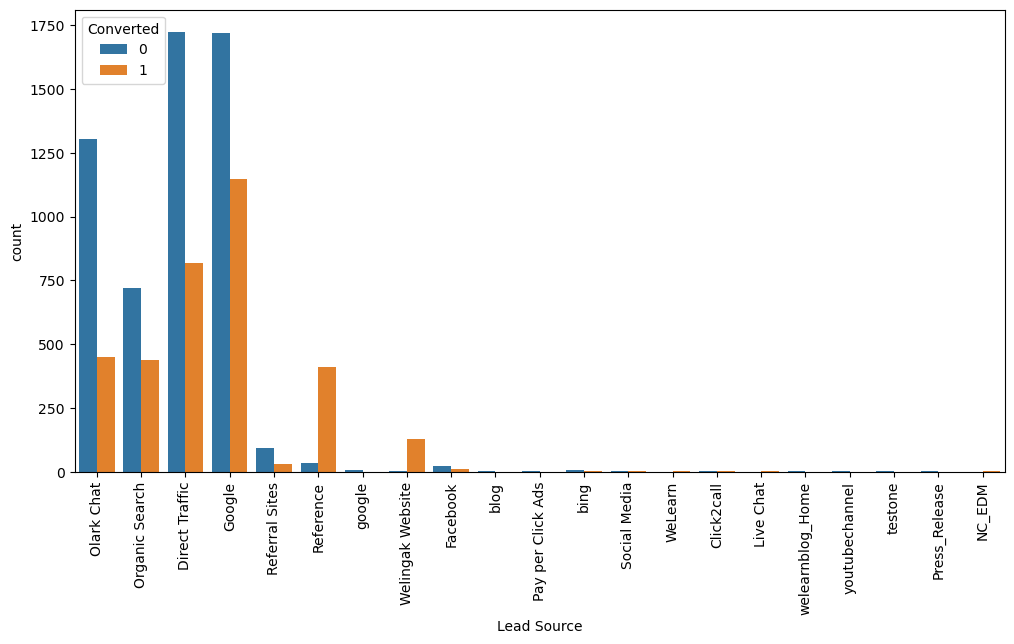

In [34]:
# Lead Source


plt.figure(figsize=(12,6))
sns.countplot(x='Lead Source',hue="Converted", data=m_data)
plt.xticks(rotation=90)

In [35]:
## as Google and google are same source we need to replace it

m_data['Lead Source']=m_data['Lead Source'].replace(['google'],'Google')

In [36]:
#As few lead sources don't have much values we can create a Category other which include all of them

m_data['Lead Source']=m_data['Lead Source'].replace(['Click2call','Live Chat','welearnblog_Home','youtubechannel','Press_Release','bing','testone','Press_Release','NC_EDM','WeLearn','Pay per Click Ads','Social Media'],'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Others')])

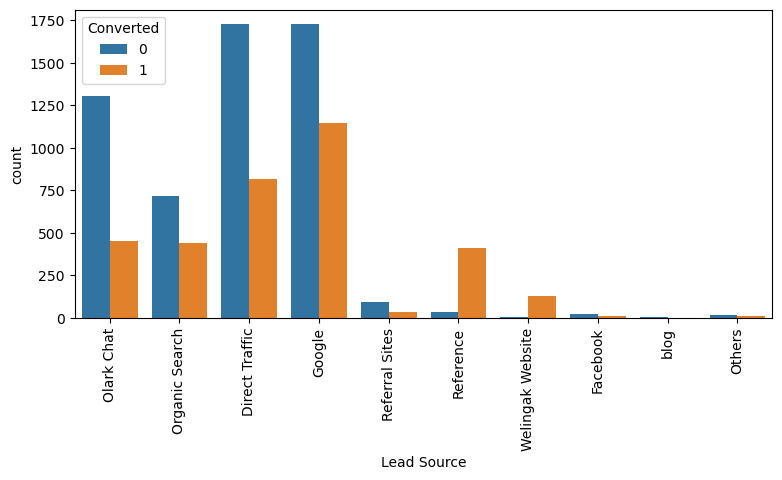

In [37]:
plt.figure(figsize=(9,4))
sns.countplot(x='Lead Source',hue="Converted", data=m_data)
plt.xticks(rotation=90)

In [38]:
## Outcomes

#1- Direct Traffice and Google are the highest lead genrators
#2  lead received through Refrence and Welingak websites has highest conversion rates
#3  To improve conversion rate we need to more focus on "Olark Chat", "Organic Search", "Direct Traffic" and "Google leads" 


<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

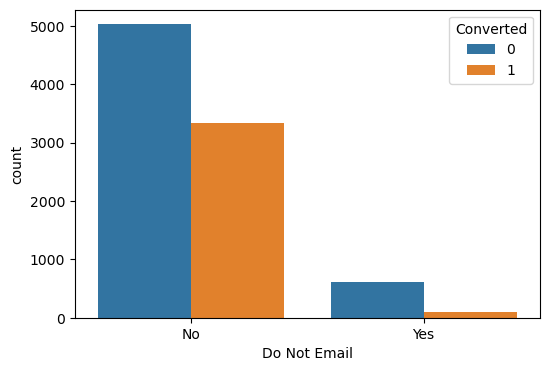

In [39]:
## Do Not email

plt.figure(figsize=(6,4))
sns.countplot(x='Do Not Email',hue="Converted", data=m_data)


In [40]:
## Outcome - maximum entries are no, so its not relevent 

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

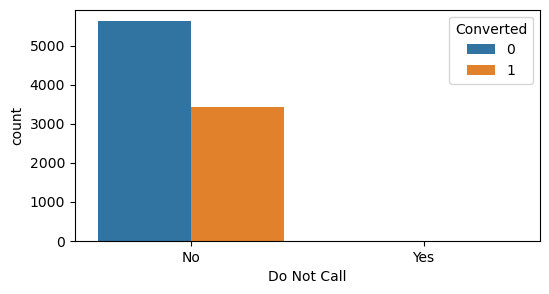

In [41]:
## 5 Do not call

plt.figure(figsize=(6,3))
sns.countplot(x='Do Not Call',hue="Converted", data=m_data)


In [42]:
## Outcome- As all entries are no, so no outcome can be drwan from this


In [43]:
# check percentile for TotalVisits
m_data['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

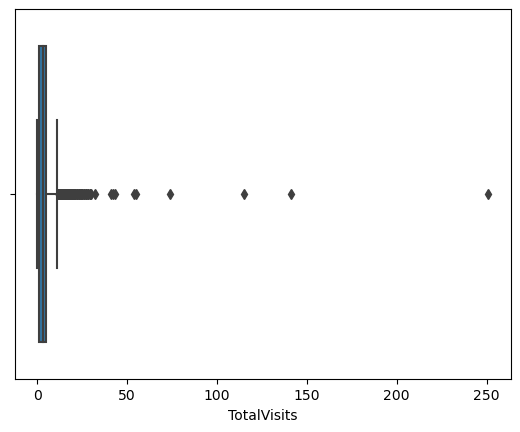

In [44]:
sns.boxplot(m_data['TotalVisits'])

In [45]:
# as we have multipleoutliers so we can not cosider this for our analysis 


In [46]:
## Page Views per visit

m_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

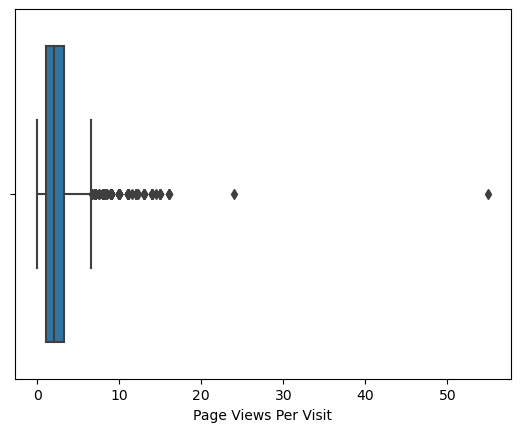

In [47]:
sns.boxplot(m_data['Page Views Per Visit'])

In [48]:
# as there are outliers in this columns as well so we not consider this in our analysis else it will Influence our final results


In [49]:
# 9 - Last Activity 

m_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

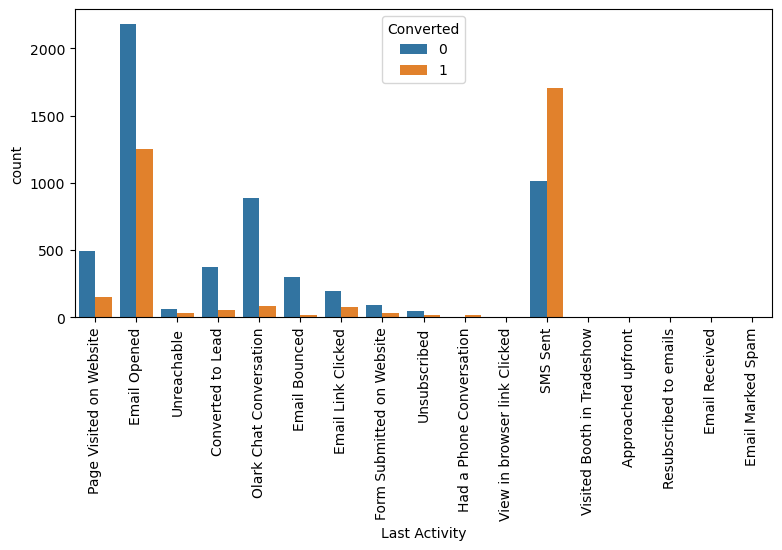

In [50]:
plt.figure(figsize=(9,4))
sns.countplot(x='Last Activity', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [51]:
# for better understandig and visibility we will club few activities to others whos values are very low

m_data['Last Activity']=m_data['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Others'),
  Text(10, 0, 'SMS Sent')])

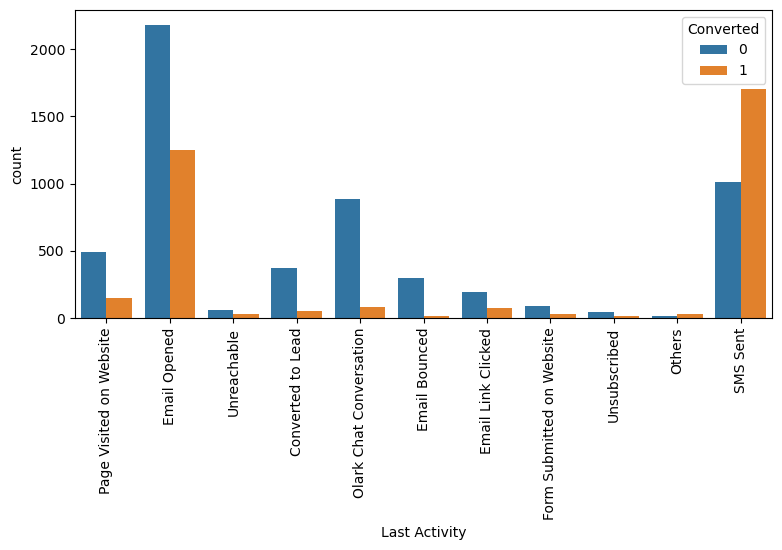

In [52]:
plt.figure(figsize=(9,4))
sns.countplot(x='Last Activity', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [53]:
## Observations - 
##1- last activity as "Email Opend" is highest
##2- COnvertion rate for last activity "SMS sent" is highest


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

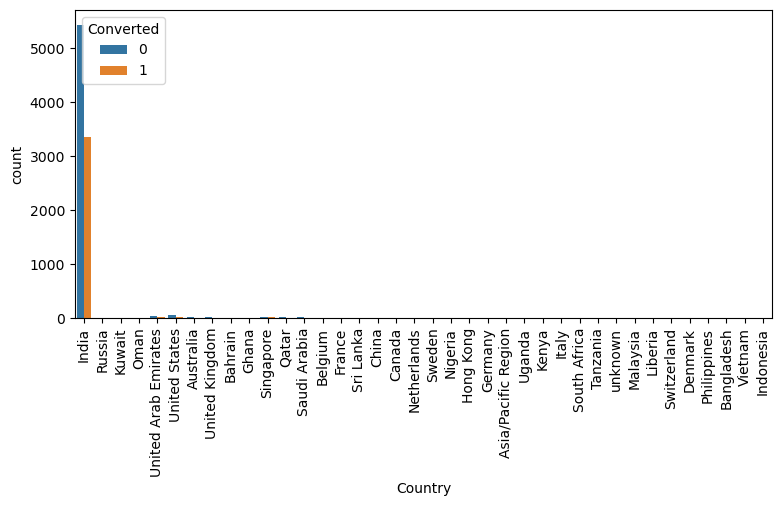

In [54]:
#country
plt.figure(figsize=(9,4))
sns.countplot(x='Country', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [55]:
# As maximum values are India, nothing can be concluded from this

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

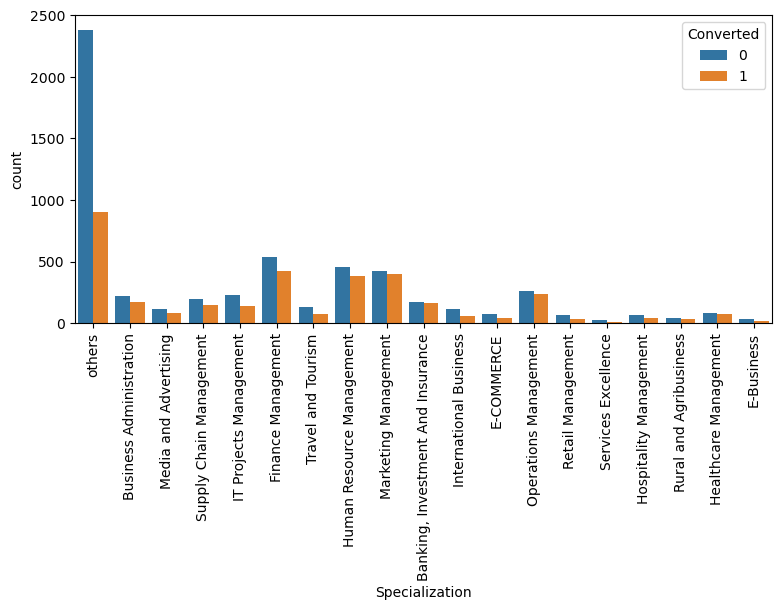

In [56]:
## Speialization

plt.figure(figsize=(9,4))
sns.countplot(x='Specialization', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [57]:
## Insted of others we can put our major focus on specialization


In [58]:
# 12 what is your current Occupation 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

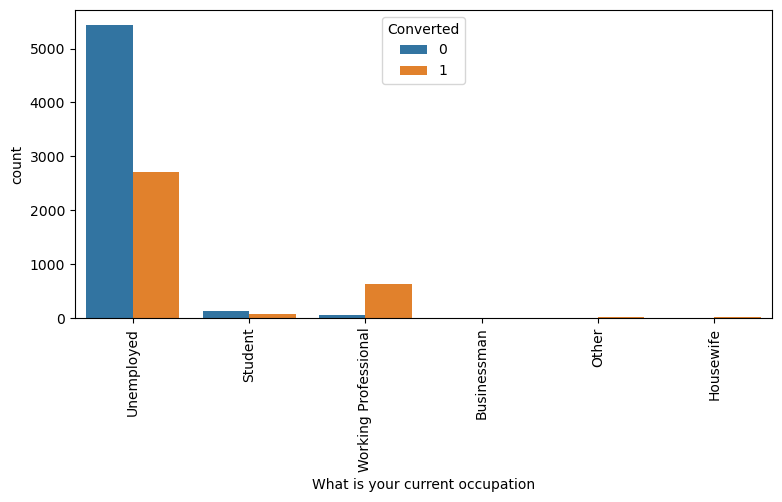

In [59]:
plt.figure(figsize=(9,4))
sns.countplot(x='What is your current occupation', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [60]:
## observation
#1- Working professional having highest conversion 
#2- lead for Unemployed had low conversion

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

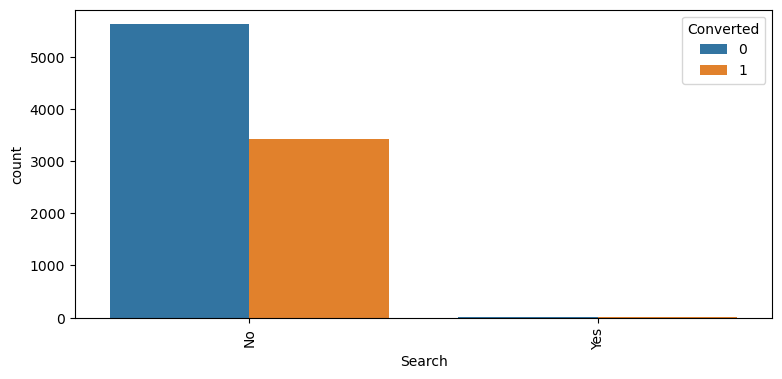

In [61]:
## 13 Search
plt.figure(figsize=(9,4))
sns.countplot(x='Search', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [62]:
#most repsonce are no, so nothing can be concluded


(array([0]), [Text(0, 0, 'No')])

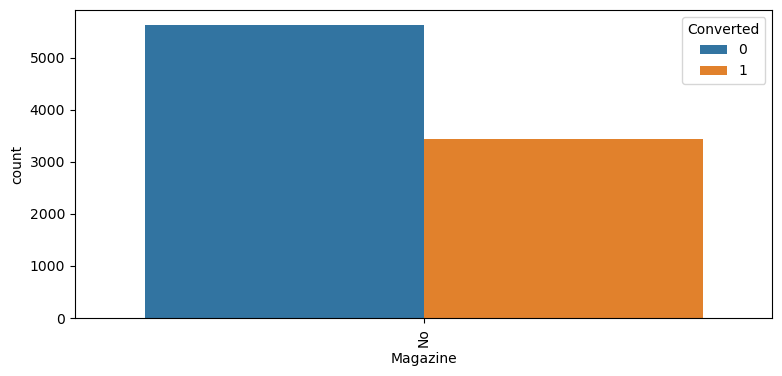

In [63]:
## 14 Magazine 
plt.figure(figsize=(9,4))
sns.countplot(x='Magazine', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [64]:
#most repsonce are no, so nothing can be concluded

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

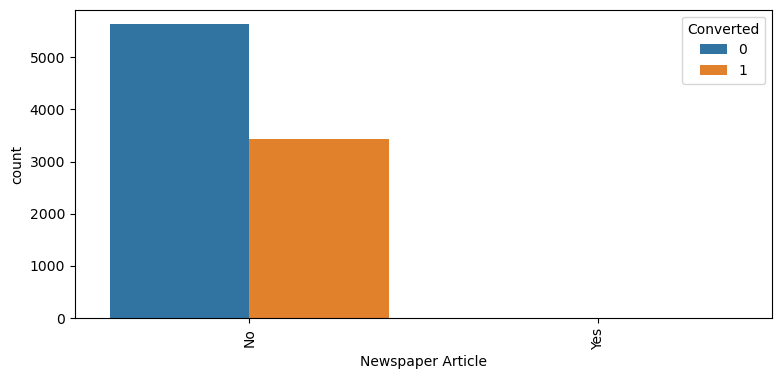

In [65]:
##15 Newspaper Article
plt.figure(figsize=(9,4))
sns.countplot(x='Newspaper Article', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [66]:
#most repsonce are no, so nothing can be concluded

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

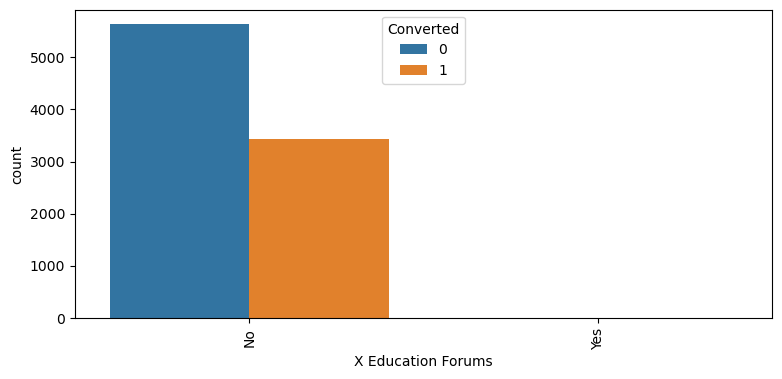

In [67]:
# 16 X Education Forums
plt.figure(figsize=(9,4))
sns.countplot(x='X Education Forums', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [68]:
#most repsonce are no, so nothing can be concluded

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

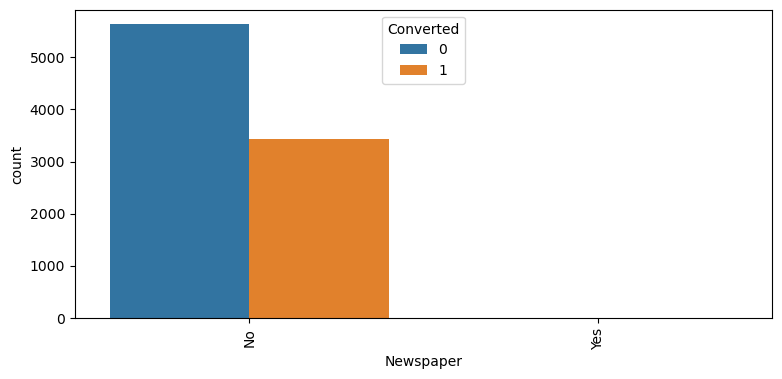

In [69]:
## 17 Newspaper
plt.figure(figsize=(9,4))
sns.countplot(x='Newspaper', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [70]:
#most repsonce are no, so nothing can be concluded

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

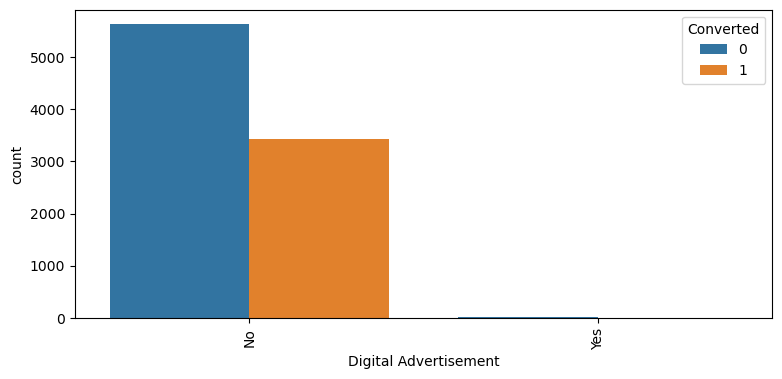

In [71]:
# 18 Digital Advertisment
plt.figure(figsize=(9,4))
sns.countplot(x='Digital Advertisement', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [ ]:
#most repsonce are no, so nothing can be concluded

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

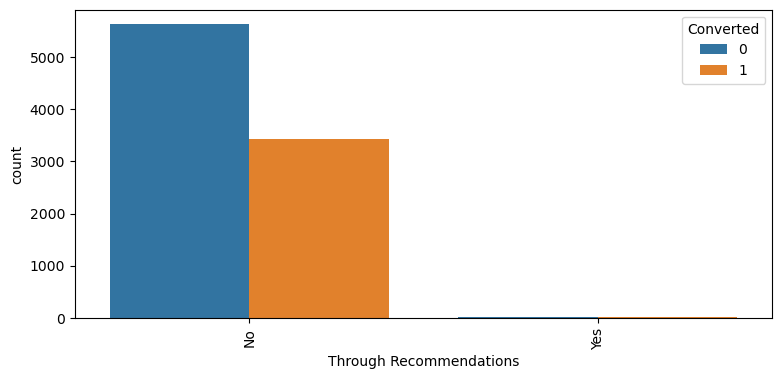

In [72]:
# Through Recommendations 

plt.figure(figsize=(9,4))
sns.countplot(x='Through Recommendations', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [73]:
#most repsonce are no, so nothing can be concluded


(array([0]), [Text(0, 0, 'No')])

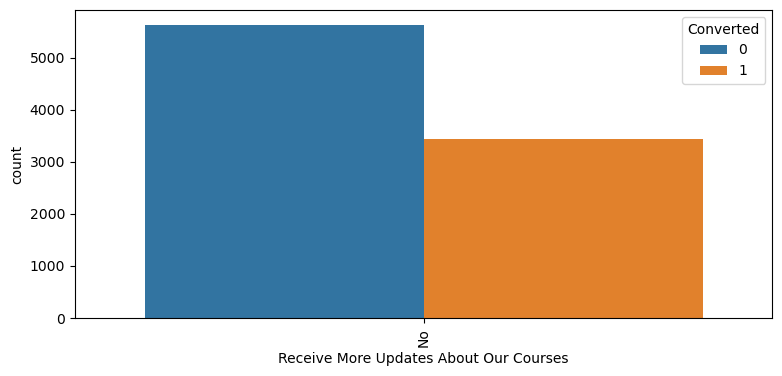

In [74]:
##20 Receive More Updates ABout Our Courses
plt.figure(figsize=(9,4))
sns.countplot(x='Receive More Updates About Our Courses', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [75]:
#most repsonce are no, so nothing can be concluded

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

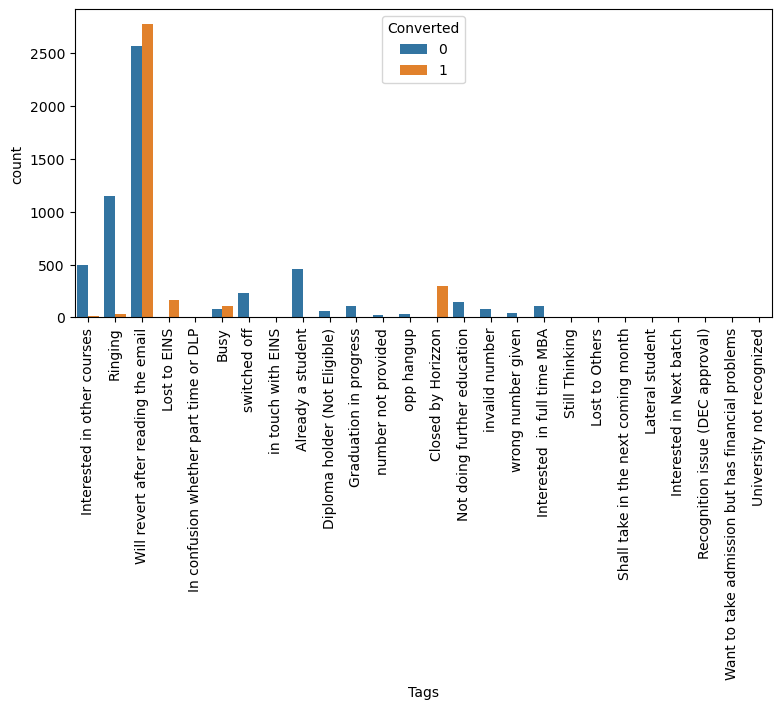

In [76]:
# 21 Tags

plt.figure(figsize=(9,4))
sns.countplot(x='Tags', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [77]:
## As Tag is the column which genrated by internal sales team, so we will remove this before start building model

(array([0]), [Text(0, 0, 'No')])

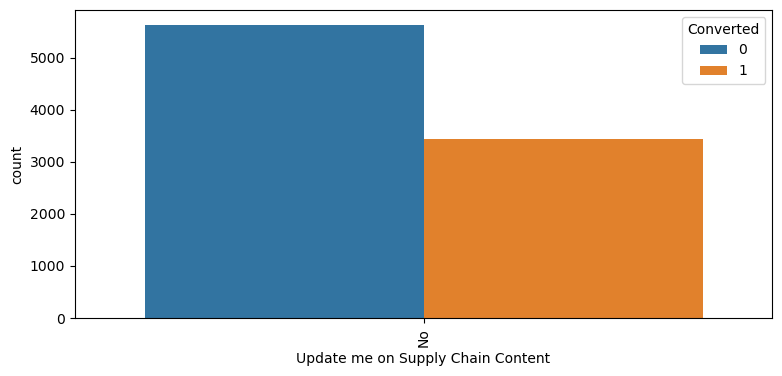

In [78]:
## 22 Update me on Supply Chain Content

plt.figure(figsize=(9,4))
sns.countplot(x='Update me on Supply Chain Content', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [79]:
#most repsonce are no, so nothing can be concluded

(array([0]), [Text(0, 0, 'No')])

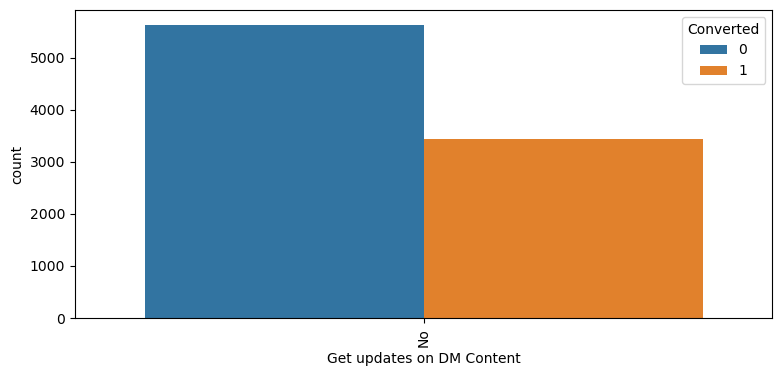

In [80]:
## Get Updates on DM Content
plt.figure(figsize=(9,4))
sns.countplot(x='Get updates on DM Content', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [81]:
#most repsonce are no, so nothing can be concluded

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

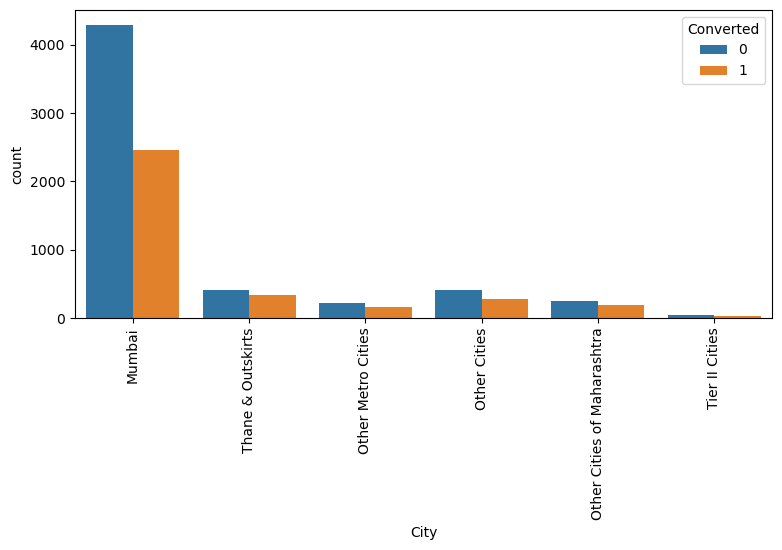

In [82]:
## 24 City
plt.figure(figsize=(9,4))
sns.countplot(x='City', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [83]:
## Most leads are from Mumbai

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

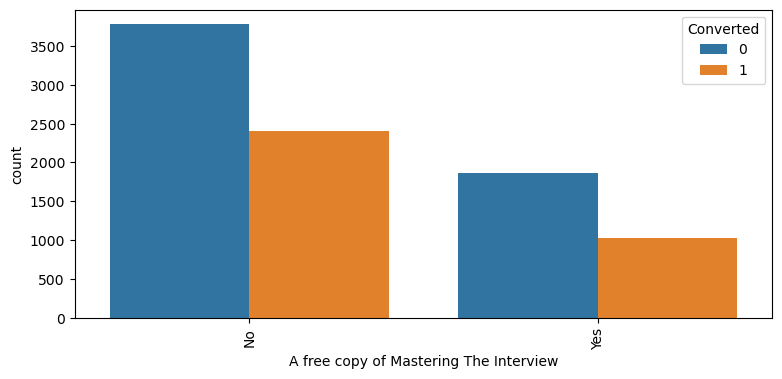

In [84]:
## 25 A free copy of Mastering The Interview
plt.figure(figsize=(9,4))
sns.countplot(x='A free copy of Mastering The Interview', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [85]:
#most repsonce are no, so nothing can be concluded

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

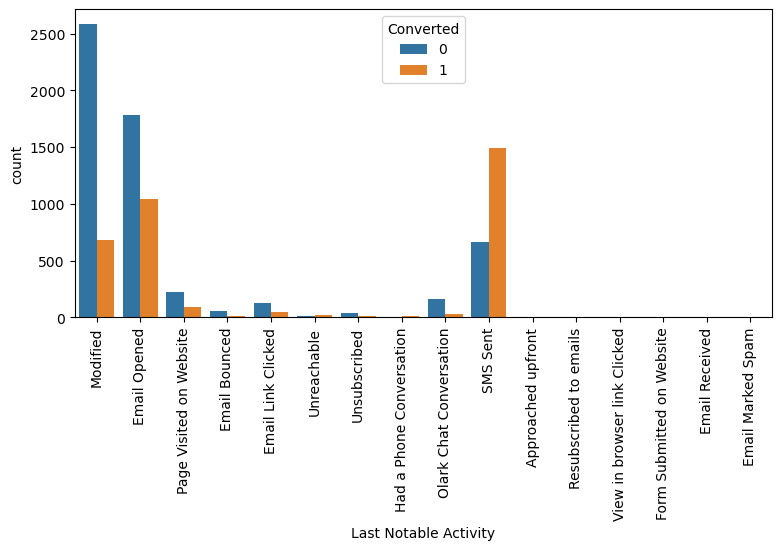

In [86]:
#26 Last Notable Activity
plt.figure(figsize=(9,4))
sns.countplot(x='Last Notable Activity', hue ="Converted", data= m_data)
plt.xticks(rotation=90)

In [87]:
# Based on above analysis we observe that most of the columns are not adding any value to our analysis, so we are dropping them


In [88]:
m_data=m_data.drop(['Lead Number',
       'Country','Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'A free copy of Mastering The Interview'],1)

In [89]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

# Final data preparation 

##1 Converting yes/no columns to 1/o for better analysis 

In [90]:
binary_data_c=['Do Not Email', 'Do Not Call']
def con_bin (x):
    return x.map({"Yes":1, "No":0})

m_data[binary_data_c] = m_data[binary_data_c].apply (con_bin)

In [91]:
## creating dummy variables  for categorical features 
# Lead Origin, Lead Source , Last Activity , Specialization ,  What is your current occupation, city, Last Notable Activity

In [92]:
dummy_data=pd.get_dummies(m_data[["Lead Origin", 
                                  "Lead Source" , "Last Activity" , "Specialization" , 
                                  "What is your current occupation", "City", "Last Notable Activity"]], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
# concatenating with primary data

m_data=pd.concat([m_data, dummy_data],axis=1)
m_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [94]:
## Dropping the original columns for which we created dummies

m_data=m_data.drop(["Lead Origin", 
                                  "Lead Source" , "Last Activity" , "Specialization" , 
                                  "What is your current occupation", "City", "Last Notable Activity"],axis=1)
m_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Data splitting 



In [95]:
# adding feature variable to X
X= m_data.drop(['Prospect ID', 'Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [96]:
y=m_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# split into train and test set

X_train, X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state =75)

In [98]:
# Scaling the features 

scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3167,0,0,0.298544,-0.034338,1.257086,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4637,0,0,-0.277939,-0.760490,-0.174896,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9040,0,0,-0.662261,-0.887336,-1.129551,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6170,0,0,-0.085778,1.807696,0.302431,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6950,0,0,-0.277939,-0.317445,-0.174896,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection uusing RFE



In [99]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [104]:


# Create a Logistic Regression model
logreg = LogisticRegression()

# Create an RFE object with the Logistic Regression model and specify the number of features to select (20 in this case)
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model to your data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [106]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_blog', False, 21),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activit

In [109]:
cols= X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

# Model Building

Using statsModel


In [113]:
X_train_sm= sm.add_constant(X_train[cols])
Model1=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.8
Date:                Sat, 16 Sep 2023   Deviance:                       5153.6
Time:                        17:02:19   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4010
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9313      0.147     -6.333      0.000      -1.220      -0.643
Do Not Email                                            -1.3661      0.190     -7.193      0.000      -1.738      -0.994
Total Time Spent on Website                              1.1064      0.041     27.261      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.0643      0.130     -8.177      0.000      -1.319      -0.809
Lead Origin_Lead Add Form                                1.7121      1.235      1.386      0.166      -0.708       4.132
Lead Source_Facebook                                     0.7138      0.519      1.376      0.169      -0.303       1.730
Lead Source_Olark Chat                                   1.0844      0.123      8.781      0.000       0.842       1.326
Lead Source_Reference                                    1.6019      1.251      1.280      0.200      -0.851       4.054
Lead Source_Welingak Website                             4.1981      1.431      2.933      0.003       1.393       7.003
Last Activity_Email Opened                               0.6080      0.105      5.806      0.000       0.403       0.813
Last Activity_Olark Chat Conversation                   -1.0633      0.191     -5.556      0.000      -1.438      -0.688
Last Activity_Others                                     1.3975      0.555      2.518      0.012       0.310       2.485
Last Activity_SMS Sent                                   0.6651      0.160      4.155      0.000       0.351       0.979
Last Activity_Unsubscribed                              -1.5822      2.678     -0.591      0.555      -6.830       3.666
Specialization_others                                   -1.0644      0.124     -8.553      0.000      -1.308      -0.820
What is your current occupation_Housewife               23.9817   2.47e+04      0.001      0.999   -4.84e+04    4.85e+04
What is your current occupation_Working Professional     2.7077      0.197     13.763      0.000       2.322       3.093
Last Notable Activity_Had a Phone Conversation          23.4379   1.87e+04      0.001      0.999   -3.65e+04    3.66e+04
Last Notable Activity_SMS Sent                           1.4466      0.150      9.667      0.000       1.153       1.740
Last Notable Activity_Unreachable                        2.2159      0.531      4.170      0.000       1.175       3.257
Last Notable Activity_Unsubscribed                       3.6723      2.720      1.350      0.177      -1.660       9.004
========================================================================================================================
"""

In [116]:
# Pvalue of What is your current occupation_Housewife is very high we can drop this one

col1=cols.drop('What is your current occupation_Housewife')

# Model-2

In [118]:
X_train_sm= sm.add_constant(X_train[col1])
Model2=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.9
Date:                Sat, 16 Sep 2023   Deviance:                       5163.7
Time:                        17:06:40   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9209      0.147     -6.275      0.000      -1.209      -0.633
Do Not Email                                            -1.3699      0.190     -7.216      0.000      -1.742      -0.998
Total Time Spent on Website                              1.1052      0.041     27.270      0.000       1.026       1.185
Lead Origin_Landing Page Submission                     -1.0645      0.130     -8.191      0.000      -1.319      -0.810
Lead Origin_Lead Add Form                                1.7106      1.235      1.386      0.166      -0.709       4.130
Lead Source_Facebook                                     0.7095      0.519      1.368      0.171      -0.307       1.726
Lead Source_Olark Chat                                   1.0826      0.123      8.771      0.000       0.841       1.325
Lead Source_Reference                                    1.6205      1.251      1.295      0.195      -0.831       4.072
Lead Source_Welingak Website                             4.1993      1.431      2.935      0.003       1.395       7.004
Last Activity_Email Opened                               0.6044      0.104      5.787      0.000       0.400       0.809
Last Activity_Olark Chat Conversation                   -1.0686      0.191     -5.587      0.000      -1.444      -0.694
Last Activity_Others                                     1.3907      0.555      2.506      0.012       0.303       2.479
Last Activity_SMS Sent                                   0.6567      0.160      4.106      0.000       0.343       0.970
Last Activity_Unsubscribed                              -1.5959      2.689     -0.594      0.553      -6.865       3.674
Specialization_others                                   -1.0697      0.124     -8.604      0.000      -1.313      -0.826
What is your current occupation_Working Professional     2.7023      0.197     13.737      0.000       2.317       3.088
Last Notable Activity_Had a Phone Conversation          22.4342   1.13e+04      0.002      0.998   -2.22e+04    2.22e+04
Last Notable Activity_SMS Sent                           1.4468      0.150      9.667      0.000       1.154       1.740
Last Notable Activity_Unreachable                        2.2071      0.531      4.154      0.000       1.166       3.248
Last Notable Activity_Unsubscribed                       3.6819      2.731      1.348      0.178      -1.671       9.035
========================================================================================================================
"""

In [ ]:
# since Last Notable Activity_Had a Phone Conversation p value is very high we can drop this

In [119]:
col1=col1.drop('Last Notable Activity_Had a Phone Conversation')

# Model-3

In [120]:
X_train_sm= sm.add_constant(X_train[col1])
Model3=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.5
Date:                Sat, 16 Sep 2023   Deviance:                       5175.1
Time:                        17:09:17   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9169      0.147     -6.254      0.000      -1.204      -0.630
Do Not Email                                            -1.3788      0.190     -7.252      0.000      -1.751      -1.006
Total Time Spent on Website                              1.1029      0.040     27.248      0.000       1.024       1.182
Lead Origin_Landing Page Submission                     -1.0632      0.130     -8.192      0.000      -1.318      -0.809
Lead Origin_Lead Add Form                                1.7102      1.234      1.385      0.166      -0.709       4.130
Lead Source_Facebook                                     0.7079      0.519      1.365      0.172      -0.309       1.725
Lead Source_Olark Chat                                   1.0794      0.123      8.746      0.000       0.838       1.321
Lead Source_Reference                                    1.6184      1.251      1.294      0.196      -0.833       4.070
Lead Source_Welingak Website                             4.2032      1.431      2.938      0.003       1.399       7.008
Last Activity_Email Opened                               0.6036      0.104      5.782      0.000       0.399       0.808
Last Activity_Olark Chat Conversation                   -1.0649      0.191     -5.569      0.000      -1.440      -0.690
Last Activity_Others                                     2.3234      0.468      4.964      0.000       1.406       3.241
Last Activity_SMS Sent                                   0.6564      0.160      4.106      0.000       0.343       0.970
Last Activity_Unsubscribed                              -1.5879      2.687     -0.591      0.554      -6.854       3.678
Specialization_others                                   -1.0774      0.124     -8.668      0.000      -1.321      -0.834
What is your current occupation_Working Professional     2.6889      0.197     13.683      0.000       2.304       3.074
Last Notable Activity_SMS Sent                           1.4462      0.150      9.667      0.000       1.153       1.739
Last Notable Activity_Unreachable                        2.2049      0.531      4.151      0.000       1.164       3.246
Last Notable Activity_Unsubscribed                       3.6814      2.729      1.349      0.177      -1.668       9.031
========================================================================================================================
"""

In [ ]:
#  as P value Last Activity_Unsubscribed for is very high we can drop this 

In [121]:
col1=col1.drop('Last Activity_Unsubscribed')

# Model 4

In [122]:
X_train_sm= sm.add_constant(X_train[col1])
Model4=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.7
Date:                Sat, 16 Sep 2023   Deviance:                       5175.5
Time:                        17:12:59   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9182      0.147     -6.262      0.000      -1.206      -0.631
Do Not Email                                            -1.3865      0.190     -7.304      0.000      -1.759      -1.014
Total Time Spent on Website                              1.1028      0.040     27.248      0.000       1.023       1.182
Lead Origin_Landing Page Submission                     -1.0634      0.130     -8.194      0.000      -1.318      -0.809
Lead Origin_Lead Add Form                                1.7095      1.234      1.385      0.166      -0.710       4.129
Lead Source_Facebook                                     0.7074      0.519      1.364      0.173      -0.309       1.724
Lead Source_Olark Chat                                   1.0792      0.123      8.745      0.000       0.837       1.321
Lead Source_Reference                                    1.6164      1.251      1.292      0.196      -0.835       4.068
Lead Source_Welingak Website                             4.2052      1.431      2.939      0.003       1.401       7.010
Last Activity_Email Opened                               0.6052      0.104      5.798      0.000       0.401       0.810
Last Activity_Olark Chat Conversation                   -1.0634      0.191     -5.561      0.000      -1.438      -0.689
Last Activity_Others                                     2.3253      0.468      4.968      0.000       1.408       3.243
Last Activity_SMS Sent                                   0.6585      0.160      4.119      0.000       0.345       0.972
Specialization_others                                   -1.0772      0.124     -8.667      0.000      -1.321      -0.834
What is your current occupation_Working Professional     2.6874      0.196     13.677      0.000       2.302       3.073
Last Notable Activity_SMS Sent                           1.4461      0.150      9.667      0.000       1.153       1.739
Last Notable Activity_Unreachable                        2.2066      0.531      4.154      0.000       1.166       3.248
Last Notable Activity_Unsubscribed                       2.1027      0.519      4.049      0.000       1.085       3.120
========================================================================================================================
"""

In [132]:
# As Lead Source_Reference has high P value, we can drop this
col1=col1.drop('Lead Source_Reference')

# Model 5 

In [133]:
X_train_sm= sm.add_constant(X_train[col1])
Model5=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.4
Date:                Sat, 16 Sep 2023   Deviance:                       5176.8
Time:                        19:11:03   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9168      0.147     -6.254      0.000      -1.204      -0.629
Do Not Email                                            -1.3851      0.190     -7.301      0.000      -1.757      -1.013
Total Time Spent on Website                              1.1027      0.040     27.250      0.000       1.023       1.182
Lead Origin_Landing Page Submission                     -1.0642      0.130     -8.201      0.000      -1.319      -0.810
Lead Origin_Lead Add Form                                3.2905      0.240     13.730      0.000       2.821       3.760
Lead Source_Facebook                                     0.7064      0.519      1.362      0.173      -0.310       1.723
Lead Source_Olark Chat                                   1.0793      0.123      8.745      0.000       0.837       1.321
Lead Source_Welingak Website                             2.6236      0.761      3.446      0.001       1.131       4.116
Last Activity_Email Opened                               0.6049      0.104      5.796      0.000       0.400       0.809
Last Activity_Olark Chat Conversation                   -1.0636      0.191     -5.563      0.000      -1.438      -0.689
Last Activity_Others                                     2.3248      0.468      4.968      0.000       1.408       3.242
Last Activity_SMS Sent                                   0.6598      0.160      4.130      0.000       0.347       0.973
Specialization_others                                   -1.0784      0.124     -8.679      0.000      -1.322      -0.835
What is your current occupation_Working Professional     2.6880      0.196     13.682      0.000       2.303       3.073
Last Notable Activity_SMS Sent                           1.4432      0.149      9.654      0.000       1.150       1.736
Last Notable Activity_Unreachable                        2.2065      0.531      4.155      0.000       1.166       3.247
Last Notable Activity_Unsubscribed                       2.1008      0.519      4.046      0.000       1.083       3.118
========================================================================================================================
"""

In [134]:
# as Lead Source_Facebook has high p value we can drop this column
col1=col1.drop('Lead Source_Facebook')

# Model 6

In [139]:
X_train_sm= sm.add_constant(X_train[col1])
Model6=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.9
Date:                Sat, 16 Sep 2023   Deviance:                       5191.8
Time:                        19:43:41   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8678      0.145     -5.991      0.000      -1.152      -0.584
Do Not Email                                            -1.2106      0.178     -6.808      0.000      -1.559      -0.862
Total Time Spent on Website                              1.0971      0.040     27.326      0.000       1.018       1.176
Lead Origin_Landing Page Submission                     -1.0894      0.128     -8.480      0.000      -1.341      -0.838
Lead Origin_Lead Add Form                                3.2579      0.239     13.658      0.000       2.790       3.725
Lead Source_Olark Chat                                   1.0667      0.122      8.715      0.000       0.827       1.307
Lead Source_Welingak Website                             2.6025      0.760      3.426      0.001       1.114       4.091
Last Activity_Email Opened                               0.5848      0.103      5.654      0.000       0.382       0.787
Last Activity_Olark Chat Conversation                   -1.0934      0.191     -5.736      0.000      -1.467      -0.720
Last Activity_Others                                     2.2868      0.467      4.895      0.000       1.371       3.202
Last Activity_SMS Sent                                   0.6346      0.159      3.999      0.000       0.324       0.946
Specialization_others                                   -1.0940      0.124     -8.833      0.000      -1.337      -0.851
What is your current occupation_Working Professional     2.6929      0.196     13.751      0.000       2.309       3.077
Last Notable Activity_SMS Sent                           1.4327      0.149      9.613      0.000       1.141       1.725
Last Notable Activity_Unreachable                        2.1741      0.530      4.106      0.000       1.136       3.212
========================================================================================================================
"""

# Checking for VIF

In [136]:
vif=pd.DataFrame()
vif['Features']= X_train[col1].columns
vif['VIF']=[variance_inflation_factor(X_train[col1].values,i) for i in range (X_train[col1].shape[1])]
vif['VIF']= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,5.95
12,Last Notable Activity_SMS Sent,4.89
2,Lead Origin_Landing Page Submission,2.69
10,Specialization_others,2.49
6,Last Activity_Email Opened,2.42
4,Lead Source_Olark Chat,2.19
7,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.72
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.32


In [138]:
## Dropping column Last Notable Activity_Unsubscribed
col1=col1.drop('Last Notable Activity_Unsubscribed')

KeyError: "['Last Notable Activity_Unsubscribed'] not found in axis"

# Model 7

In [140]:
X_train_sm= sm.add_constant(X_train[col1])
Model7=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.9
Date:                Sat, 16 Sep 2023   Deviance:                       5191.8
Time:                        19:44:14   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8678      0.145     -5.991      0.000      -1.152      -0.584
Do Not Email                                            -1.2106      0.178     -6.808      0.000      -1.559      -0.862
Total Time Spent on Website                              1.0971      0.040     27.326      0.000       1.018       1.176
Lead Origin_Landing Page Submission                     -1.0894      0.128     -8.480      0.000      -1.341      -0.838
Lead Origin_Lead Add Form                                3.2579      0.239     13.658      0.000       2.790       3.725
Lead Source_Olark Chat                                   1.0667      0.122      8.715      0.000       0.827       1.307
Lead Source_Welingak Website                             2.6025      0.760      3.426      0.001       1.114       4.091
Last Activity_Email Opened                               0.5848      0.103      5.654      0.000       0.382       0.787
Last Activity_Olark Chat Conversation                   -1.0934      0.191     -5.736      0.000      -1.467      -0.720
Last Activity_Others                                     2.2868      0.467      4.895      0.000       1.371       3.202
Last Activity_SMS Sent                                   0.6346      0.159      3.999      0.000       0.324       0.946
Specialization_others                                   -1.0940      0.124     -8.833      0.000      -1.337      -0.851
What is your current occupation_Working Professional     2.6929      0.196     13.751      0.000       2.309       3.077
Last Notable Activity_SMS Sent                           1.4327      0.149      9.613      0.000       1.141       1.725
Last Notable Activity_Unreachable                        2.1741      0.530      4.106      0.000       1.136       3.212
========================================================================================================================
"""

In [141]:
## Checking for VIF values again
vif=pd.DataFrame()
vif['Features']= X_train[col1].columns
vif['VIF']=[variance_inflation_factor(X_train[col1].values,i) for i in range (X_train[col1].shape[1])]
vif['VIF']= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,5.94
12,Last Notable Activity_SMS Sent,4.89
2,Lead Origin_Landing Page Submission,2.69
10,Specialization_others,2.49
6,Last Activity_Email Opened,2.42
4,Lead Source_Olark Chat,2.19
7,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.72
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [142]:
## Dropping 'Last Notable Activity_Unreachable' to reduce variables

col1=col1.drop('Last Notable Activity_Unreachable')

# Model -8

In [143]:
X_train_sm= sm.add_constant(X_train[col1])
Model8=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.0
Date:                Sat, 16 Sep 2023   Deviance:                       5209.9
Time:                        19:48:08   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3957
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7950      0.143     -5.566      0.000      -1.075      -0.515
Do Not Email                                            -1.2385      0.177     -6.982      0.000      -1.586      -0.891
Total Time Spent on Website                              1.0950      0.040     27.350      0.000       1.017       1.173
Lead Origin_Landing Page Submission                     -1.0975      0.128     -8.571      0.000      -1.349      -0.847
Lead Origin_Lead Add Form                                3.2614      0.238     13.688      0.000       2.794       3.728
Lead Source_Olark Chat                                   1.0653      0.122      8.720      0.000       0.826       1.305
Lead Source_Welingak Website                             2.5945      0.759      3.416      0.001       1.106       4.083
Last Activity_Email Opened                               0.5207      0.101      5.132      0.000       0.322       0.720
Last Activity_Olark Chat Conversation                   -1.1564      0.190     -6.097      0.000      -1.528      -0.785
Last Activity_Others                                     2.2232      0.467      4.763      0.000       1.308       3.138
Last Activity_SMS Sent                                   0.5724      0.158      3.634      0.000       0.264       0.881
Specialization_others                                   -1.1056      0.124     -8.952      0.000      -1.348      -0.864
What is your current occupation_Working Professional     2.7008      0.196     13.806      0.000       2.317       3.084
Last Notable Activity_SMS Sent                           1.4327      0.149      9.611      0.000       1.141       1.725
========================================================================================================================
"""

In [144]:
## Checking for VIF values again
vif=pd.DataFrame()
vif['Features']= X_train[col1].columns
vif['VIF']=[variance_inflation_factor(X_train[col1].values,i) for i in range (X_train[col1].shape[1])]
vif['VIF']= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,5.93
12,Last Notable Activity_SMS Sent,4.89
2,Lead Origin_Landing Page Submission,2.66
10,Specialization_others,2.48
6,Last Activity_Email Opened,2.40
4,Lead Source_Olark Chat,2.19
7,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.72
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31


In [145]:
# dropping "Last Notable Activity_SMS Sent"
col1=col1.drop('Last Notable Activity_SMS Sent')

# Model 9

In [146]:
X_train_sm= sm.add_constant(X_train[col1])
Model8=sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
result=Model8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.2
Date:                Sat, 16 Sep 2023   Deviance:                       5308.5
Time:                        19:51:41   Pearson chi2:                 6.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8087      0.142     -5.693      0.000      -1.087      -0.530
Do Not Email                                            -1.2680      0.176     -7.215      0.000      -1.613      -0.924
Total Time Spent on Website                              1.0931      0.040     27.571      0.000       1.015       1.171
Lead Origin_Landing Page Submission                     -1.0783      0.127     -8.491      0.000      -1.327      -0.829
Lead Origin_Lead Add Form                                3.2505      0.236     13.773      0.000       2.788       3.713
Lead Source_Olark Chat                                   1.0918      0.121      9.034      0.000       0.855       1.329
Lead Source_Welingak Website                             2.5088      0.758      3.308      0.001       1.022       3.995
Last Activity_Email Opened                               0.5155      0.101      5.089      0.000       0.317       0.714
Last Activity_Olark Chat Conversation                   -1.1686      0.189     -6.173      0.000      -1.540      -0.798
Last Activity_Others                                     2.2197      0.467      4.755      0.000       1.305       3.135
Last Activity_SMS Sent                                   1.6973      0.103     16.500      0.000       1.496       1.899
Specialization_others                                   -1.0952      0.122     -8.944      0.000      -1.335      -0.855
What is your current occupation_Working Professional     2.7086      0.194     13.958      0.000       2.328       3.089
========================================================================================================================
"""

In [147]:
## Checking for VIF values again
vif=pd.DataFrame()
vif['Features']= X_train[col1].columns
vif['VIF']=[variance_inflation_factor(X_train[col1].values,i) for i in range (X_train[col1].shape[1])]
vif['VIF']= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.66
10,Specialization_others,2.48
6,Last Activity_Email Opened,2.40
9,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.18
7,Last Activity_Olark Chat Conversation,1.73
3,Lead Origin_Lead Add Form,1.71
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.31
0,Do Not Email,1.19


In [150]:
#Making predictions on Train data set to check
# Getting predttion values on train set

y_train_pred=result.predict(X_train_sm)
y_train_pred[:10]

3167    0.193732
4637    0.061908
9040    0.049710
6170    0.856476
6950    0.368981
5676    0.739403
1178    0.166198
6864    0.457291
4331    0.572734
221     0.024011
dtype: float64

In [151]:
# changing to array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19373181, 0.0619076 , 0.04971001, 0.8564757 , 0.36898133,
       0.73940272, 0.16619754, 0.45729104, 0.57273382, 0.02401122])

In [152]:
# creating datafram to predict probabilities 

y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.193732,3167
1,0,0.061908,4637
2,1,0.049710,9040
3,1,0.856476,6170
4,0,0.368981,6950


In [154]:
## Creating a new column 'predicted' with 1 if Converted_prob >0.5 else 0


y_train_pred_final['predicted']= y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.193732,3167,0
1,0,0.061908,4637,0
2,1,0.049710,9040,0
3,1,0.856476,6170,1
4,0,0.368981,6950,0


In [156]:
# Creating confusion matrix

confusion_m=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion_m)

[[3542  422]
 [ 804 1583]]


In [ ]:
#predicted/Actual     not_converted      converted

#not_converted        3542               422
#converted            804.               1583

In [160]:
#overall accuuracy
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8069595339316643


In [161]:
TP= confusion_m[1,1]
TN= confusion_m[0,0]
FP= confusion_m[0,1]
FN= confusion_m[1,0]

In [162]:
# Sensitivity  of our final model
print("Sensitivity :", TP/float(TP+FN))

Sensitivity : 0.6631755341432761


In [163]:
# Specificity  of our final model
print("Specificity :", TN/float(TN+FP))

Specificity : 0.8935418768920282


In [165]:
# Check for false positive  rate

print("False Positive Rate :", FP/float(TN+FP) )

False Positive Rate : 0.10645812310797174


In [166]:
# Check for Positive Predicitive Value

print("Positive Predicitive Value :", TP/float(TP+FP) )

Positive Predicitive Value : 0.7895261845386534


In [167]:
# Check for Negative Predicitive Value

print("Negative Predicitive Value :", TN/float(TN+FN) )

Negative Predicitive Value : 0.8150023009664059


In [ ]:
## Accuracy : 0.8069595339316643
##Sensitivity : 0.6631755341432761
## Specificity : 0.8935418768920282
## False Positive Rate : 0.10645812310797174
## Positive Predicitive Value : 0.7895261845386534
## Negative Predicitive Value : 0.8150023009664059

In [ ]:
## As Accuracy of Model is 80.69% but Sensitivity is 66.31%

which need to be considered it 

The main reason behind low sensitivity because of the cut of 0.5 we choose . 
As cut off point need to be optimised using ROC curve

# ROC Curve

In [184]:
def draw_roc (actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate= False)
    
    auc_score= metrics.roc_auc_score (actual, probs)
    plt.figure (figsize= (5,4))
    plt.plot(fpr,tpr, label ='ROC curve (area= %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],   'k--')
    plt.xlim([0.0, 1.05])
    plt.xlabel ('False Postive Rate or [1- True Negative Rate]')
    plt.ylabel ('True Positive Rate')
    plt.title ('ROC')
    plt.legend (loc= "lower right")
    plt.show()
    
    return None

In [185]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

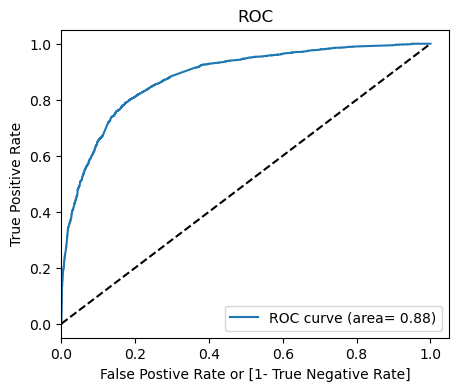

In [186]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
## Observation -- Since we have higer (0.88) area under the ROC curve, therefore our Final model (Model-9) is 

# Finding Optimal Cutoff point


In [ ]:
# Previously we consider 0.5 as our cut of Point but in order to get balance between senstivity and specificity

In [190]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x:1 if x> i else 0)
    y_train_pred_final.head()

In [191]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.375846  1.000000  0.000000
0.1   0.1  0.598646  0.968580  0.375883
0.2   0.2  0.735317  0.920402  0.623865
0.3   0.3  0.794835  0.835777  0.770182
0.4   0.4  0.813573  0.768328  0.840817
0.5   0.5  0.806960  0.663176  0.893542
0.6   0.6  0.797197  0.591537  0.921039
0.7   0.7  0.782869  0.511102  0.946519
0.8   0.8  0.757519  0.403854  0.970484
0.9   0.9  0.706818  0.234185  0.991423


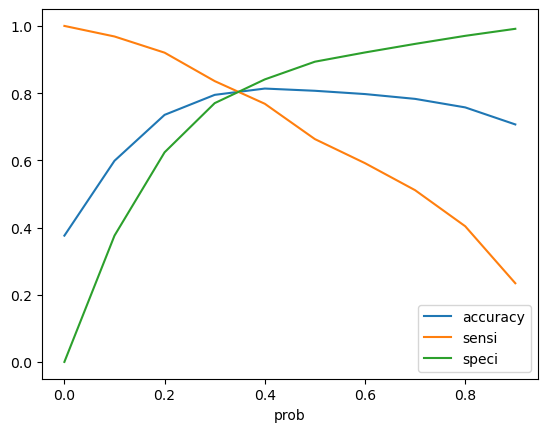

In [194]:
# lets plot accuracy senstivity and specificity for various probabilities 

cutoff_df.plot.line (x='prob', y= ['accuracy','sensi','speci'])
plt.show()

In [195]:
y_train_pred_final['final_predicted']= y_train_pred_final.Converted_prob.map(lambda x : 1 if x >0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193732,3167,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061908,4637,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.049710,9040,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.856476,6170,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.368981,6950,0,1,1,1,1,0,0,0,0,0,0,1


# Try to lead score with trianing data 

In [197]:
y_train_pred_final['Lead_Score']= y_train_pred_final.Converted_prob.map(lambda x : round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.193732,3167,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.061908,4637,0,1,0,0,0,0,0,0,0,0,0,0,6
2,1,0.049710,9040,0,1,0,0,0,0,0,0,0,0,0,0,5
3,1,0.856476,6170,1,1,1,1,1,1,1,1,1,1,0,1,86
4,0,0.368981,6950,0,1,1,1,1,0,0,0,0,0,0,1,37


In [ ]:
### with uppdated cut off point

In [198]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.807589356006928


In [199]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3211,  753],
       [ 469, 1918]])

In [200]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [201]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8035190615835777


In [202]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8100403632694249


In [203]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.18995963673057517


In [204]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7180831149382254


In [205]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.872554347826087


# Check for confusion matrix again

In [206]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3542,  422],
       [ 804, 1583]])

In [208]:
# Precision 
TP/TP+FP
print("Precision : ", confusion [1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7895261845386534


In [209]:
## Recall
TP/TP+FN

print("Recall : ", confusion [1,1]/(confusion[1,0]+confusion[1,1]))

Recall :  0.6631755341432761


In [212]:
# Using sklearn.metrics 



In [213]:
print("Precision :", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision : 0.7895261845386534


In [214]:
print("Recall :", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6631755341432761


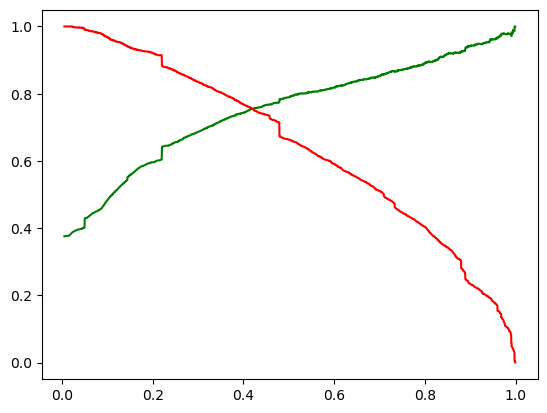

In [222]:
p,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1],"g-")
plt.plot(thresholds, r[:-1],"r-")
plt.show()

# Making predictions for test set

In [ ]:
# first we need to scale the test set

In [224]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [225]:
X_test =X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_others,What is your current occupation_Working Professional
5195,0,1.498852,1,0,0,0,0,0,0,1,0,0
1171,0,1.954765,1,0,0,0,0,0,1,0,0,0
764,0,-0.797257,0,0,0,0,0,0,0,0,0,1
2261,0,-0.699824,1,0,0,0,0,0,0,0,0,0
5508,0,1.110959,1,0,0,0,0,0,0,1,0,0


In [227]:
## Add a constant

X_test_sm =sm.add_constant(X_test)

y_test_pred =result.predict(X_test_sm)
y_test_pred 

5195    0.809804
1171    0.921973
764     0.736628
2261    0.065872
5508    0.735896
          ...   
2337    0.851098
1091    0.049710
6489    0.094754
4369    0.477057
2999    0.054801
Length: 2723, dtype: float64

In [228]:
#convert Y-test to a dataFrame

y_pred_1=pd.DataFrame(y_test_pred)
y_pred_1

,0
5195,0.809804
1171,0.921973
764,0.736628
2261,0.065872
5508,0.735896
...,...
2337,0.851098
1091,0.049710
6489,0.094754
4369,0.477057


In [229]:
y_test_df =pd.DataFrame(y_test)

In [230]:
# Adding Prospect ID as well

y_test_df['Prospect ID']= y_test_df.index

In [233]:
## append both data frame

y_pred_1.reset_index(drop=True, inplace =True)

y_test_df.reset_index(drop=True, inplace =True)

y_pred_final =pd.concat([y_test_df, y_pred_1], axis=1)

In [234]:
y_pred_final

,Converted,Prospect ID,0
0,1,5195,0.809804
1,1,1171,0.921973
2,1,764,0.736628
3,0,2261,0.065872
4,0,5508,0.735896
...,...,...,...
2718,1,2337,0.851098
2719,0,1091,0.049710
2720,0,6489,0.094754
2721,1,4369,0.477057


In [235]:
# update the names and arrnage them properly 

y_pred_final=y_pred_final.rename(columns ={0: "Converted_prob"})
y_pred_final =y_pred_final .reindex (columns =["Prospect ID", 'Converted', 'Converted_prob'])
y_pred_final

,Prospect ID,Converted,Converted_prob
0,5195,1,0.809804
1,1171,1,0.921973
2,764,1,0.736628
3,2261,0,0.065872
4,5508,0,0.735896
...,...,...,...
2718,2337,1,0.851098
2719,1091,0,0.049710
2720,6489,0,0.094754
2721,4369,1,0.477057


In [236]:
y_pred_final['final_predicted']=y_pred_final.Converted_prob.map(lambda x : 1 if x >0.35 else 0)
y_pred_final

,Prospect ID,Converted,Converted_prob,final_predicted
0,5195,1,0.809804,1
1,1171,1,0.921973,1
2,764,1,0.736628,1
3,2261,0,0.065872,0
4,5508,0,0.735896,1
...,...,...,...,...
2718,2337,1,0.851098,1
2719,1091,0,0.049710,0
2720,6489,0,0.094754,0
2721,4369,1,0.477057,1


In [242]:
# checking the over all accuracy once again

accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print("Accuracy:", round(accuracy, 2))


Accuracy: 0.81


In [243]:
# checking confusion matrix once again

Confusion2=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
Confusion2

array([[1377,  298],
       [ 216,  832]])

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Now finally check the senstivity and specificity finally 



In [253]:

sensitivity = TP / float(TP + FN)
print("Sensitivity:", round(sensitivity, 5))

specificity = TN / float(TN + FP)
print("Specificity:", round(specificity, 5))


Sensitivity: 0.80352
Specificity: 0.81004


In [255]:
## Assigining lead Score to the testing data

y_pred_final['Lead_Score']= y_pred_final.Converted_prob.map(lambda x : round(x*100))

In [256]:
y_pred_final

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,5195,1,0.809804,1,81
1,1171,1,0.921973,1,92
2,764,1,0.736628,1,74
3,2261,0,0.065872,0,7
4,5508,0,0.735896,1,74
...,...,...,...,...,...
2718,2337,1,0.851098,1,85
2719,1091,0,0.049710,0,5
2720,6489,0,0.094754,0,9
2721,4369,1,0.477057,1,48


# Final Observations 
                Train data.       Test Data
Accuracy    :    80%                  81%
Sentivity   :    80%                  80%
Specificity :    81%                  81%

In [ ]:
# Finally our main objective to find out which leads are hot lead


In [258]:
hot_leads = y_pred_final[y_pred_final["Lead_Score"] >= 85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1171,1,0.921973,1,92
18,8190,0,0.888351,1,89
35,2543,1,0.879467,1,88
42,5633,1,0.976322,1,98
47,2131,1,0.888351,1,89
...,...,...,...,...,...
2661,4909,1,0.976322,1,98
2671,4862,1,0.972685,1,97
2686,7171,1,0.987551,1,99
2701,1467,1,0.965959,1,97


In [ ]:
# 406 leads are hot leads, means have higher chances of conversion


In [259]:
# Model 9 Important features

result.params.sort_values(ascending =False)

Lead Origin_Lead Add Form                               3.250480
What is your current occupation_Working Professional    2.708639
Lead Source_Welingak Website                            2.508787
Last Activity_Others                                    2.219725
Last Activity_SMS Sent                                  1.697341
Total Time Spent on Website                             1.093062
Lead Source_Olark Chat                                  1.091834
Last Activity_Email Opened                              0.515497
const                                                  -0.808670
Lead Origin_Landing Page Submission                    -1.078273
Specialization_others                                  -1.095234
Last Activity_Olark Chat Conversation                  -1.168577
Do Not Email                                           -1.268037
dtype: float64

# Recommendations

1. **Lead Origin_Lead Add Form (3.250480)**: Prioritize leads generated from the "Lead Add Form" as they have a significantly higher conversion potential.

2. **What is your current occupation_Working Professional (2.708639)**: Focus marketing efforts on working professionals, as they exhibit a high likelihood of conversion.

3. **Lead Source_Welingak Website (2.508787)**: Allocate resources to leads originating from the "Welingak Website," as they show promise in conversion.

4. **Last Activity_Others (2.219725)**: Investigate and engage with leads categorized under "Others" for potential conversion opportunities.

5. **Last Activity_SMS Sent (1.697341)**: Continue sending SMS messages, as it has a positive impact on lead conversion.

6. **Total Time Spent on Website (1.093062)**: Encourage leads to spend more time on your website, as it correlates positively with conversion.

7. **Lead Source_Olark Chat (1.091834)**: Pay attention to leads coming from "Olark Chat" and engage in active chat conversations to boost conversions.

8. **Last Activity_Email Opened (0.515497)**: Focus on crafting compelling email content that encourages lead engagement.

9. **const (-0.808670)**: Consider adjusting your model's intercept or baseline, as it negatively affects the conversion prediction.

10. **Lead Origin_Landing Page Submission (-1.078273)**: Optimize landing pages to improve conversion rates for leads from this source.

11. **Specialization_others (-1.095234)**: Explore ways to engage leads with "Other" specializations to increase conversion rates.

12. **Last Activity_Olark Chat Conversation (-1.168577)**: Proactively engage with leads in "Olark Chat Conversations" to address concerns and improve conversion chances.

13. **Do Not Email (-1.2680)**: Be cautious when sending emails to leads who have opted not to receive emails, as it negatively impacts conversion rates.
